In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import calendar
import datetime

In [2]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [4]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [6]:
df.columns = ['States','Date','Frequency','Estimated_Unemployment_Rate','Estimated_Employed','Estimated_Labour_Participation_Rate','Region','Longitude','Latitude']

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Frequency'] = pd.Categorical(df['Frequency'])
df['Region'] = pd.Categorical(df['Region'])
df['Month_int'] = pd.to_datetime(df['Date']).dt.month
df["Month_name"] = df["Date"].dt.month.map(lambda x: calendar.month_abbr[int(x)])
df.head(10)

,States,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Region,Longitude,Latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May
5,Andhra Pradesh,2020-06-30,M,3.31,19805400,47.41,South,15.9129,79.74,6,Jun
6,Andhra Pradesh,2020-07-31,M,8.34,15431615,38.91,South,15.9129,79.74,7,Jul
7,Andhra Pradesh,2020-08-31,M,6.96,15251776,37.83,South,15.9129,79.74,8,Aug
8,Andhra Pradesh,2020-09-30,M,6.40,15220312,37.47,South,15.9129,79.74,9,Sep
9,Andhra Pradesh,2020-10-31,M,6.59,15157557,37.34,South,15.9129,79.74,10,Oct


In [8]:
df_stat = df[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']]
print(df_stat.describe().T.round(2))

                                     count         mean          std  \
Estimated_Unemployment_Rate          267.0        12.24        10.80   
Estimated_Employed                   267.0  13962105.72  13366318.36   
Estimated_Labour_Participation_Rate  267.0        41.68         7.85   

                                           min         25%         50%  \
Estimated_Unemployment_Rate               0.50        4.84        9.65   
Estimated_Employed                   117542.00  2838930.50  9732417.00   
Estimated_Labour_Participation_Rate      16.77       37.26       40.39   

                                             75%          max  
Estimated_Unemployment_Rate                16.76        75.85  
Estimated_Employed                   21878686.00  59433759.00  
Estimated_Labour_Participation_Rate        44.06        69.69  


In [9]:
region_stats = df.groupby(['Region'])[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate']].mean().reset_index()
print(region_stats.round(2))

      Region  Estimated_Unemployment_Rate  Estimated_Employed  \
0       East                        13.92         19602366.90   
1      North                        15.89         13072487.92   
2  Northeast                        10.95          3617105.53   
3      South                        10.45         14040589.33   
4       West                         8.24         18623512.72   

   Estimated_Labour_Participation_Rate  
0                                40.11  
1                                38.70  
2                                52.06  
3                                40.44  
4                                41.26  


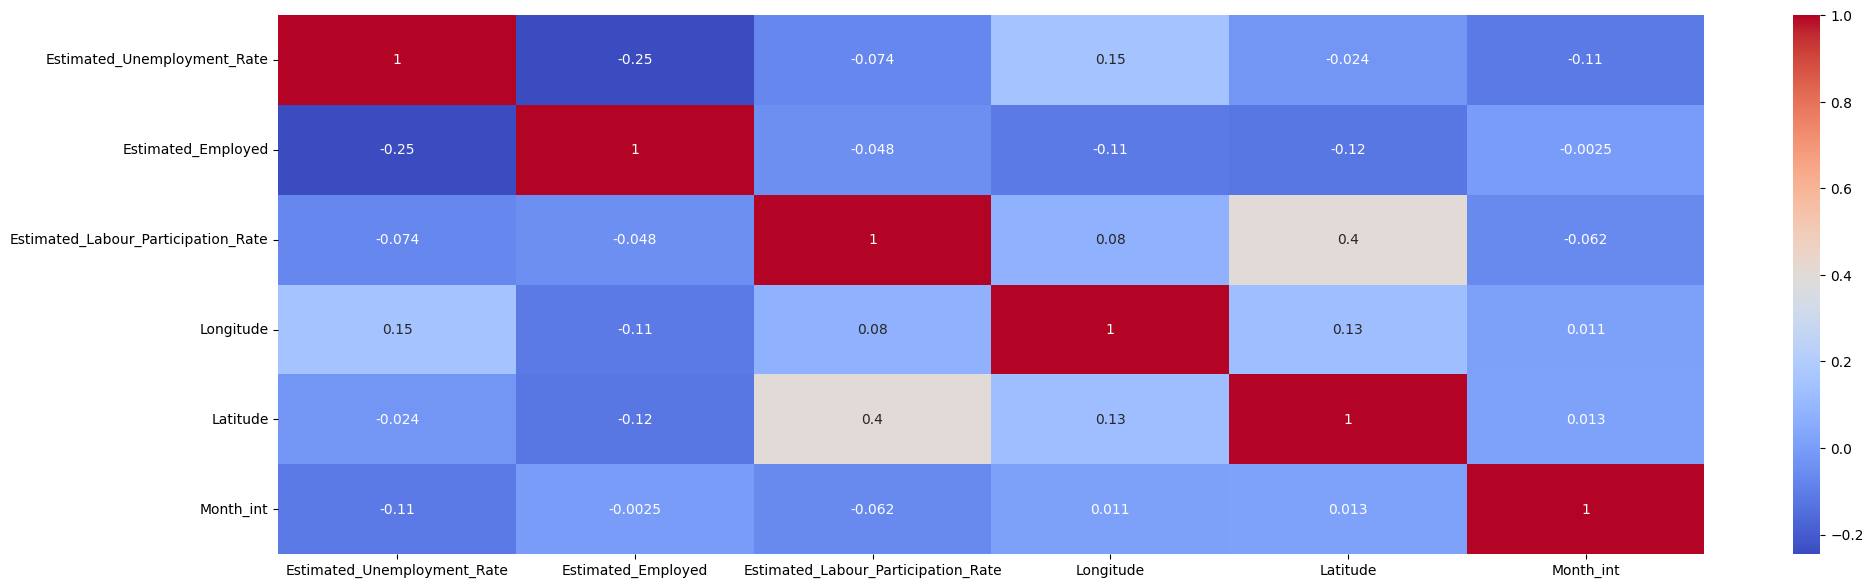

In [10]:
hm_data = df[['Estimated_Unemployment_Rate', 'Estimated_Employed', 'Estimated_Labour_Participation_Rate', 'Longitude', 'Latitude', 'Month_int']]
hm = hm_data.corr()
plt.figure(figsize=(23, 7))
sns.heatmap(data=hm, annot=True, cmap='coolwarm')
plt.show()

In [11]:
plot = px.box(df, x='States', y='Estimated_Unemployment_Rate', color='States', title='Unemployment rate per States')
plot.update_layout(xaxis={'categoryorder': 'total descending'})
plot.show()

In [12]:
plot_unemp = df[['Estimated_Unemployment_Rate','States']]
df_unemployed = plot_unemp.groupby('States').mean().reset_index()
df_unemployed = df_unemployed.sort_values('Estimated_Unemployment_Rate')
px.bar(df_unemployed, x='States',y='Estimated_Unemployment_Rate',color = 'States',title = 'Average_unemployment_rate_in_each_state')

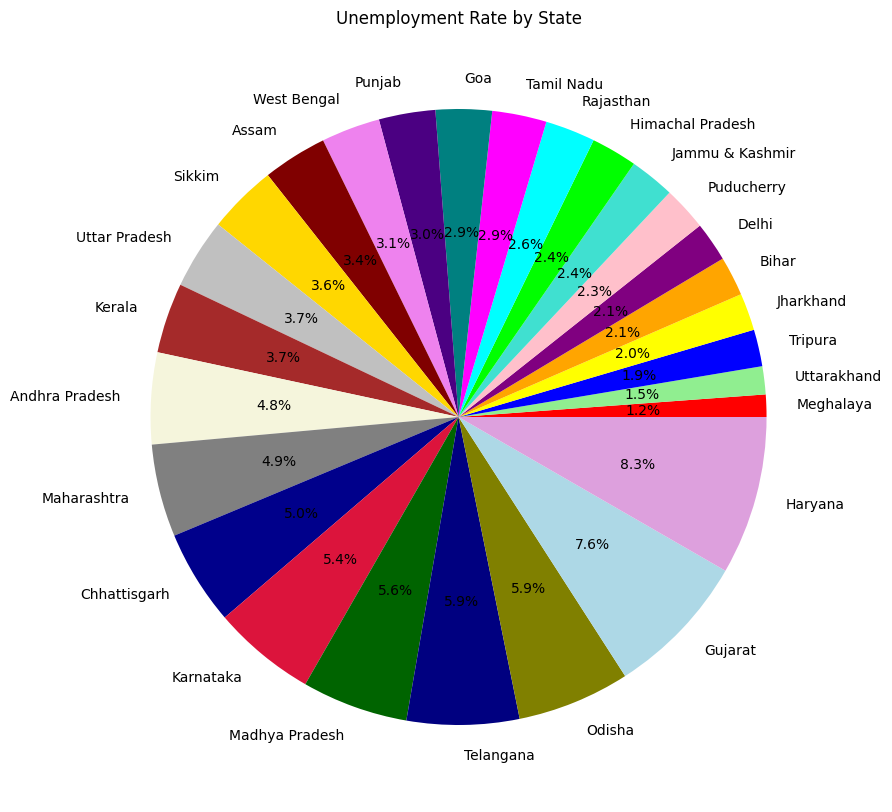

In [13]:
plt.figure(figsize=(15,10))
plt.pie(df_unemployed['Estimated_Unemployment_Rate'],labels=df_unemployed['States'].value_counts().index,autopct="%1.1f%%",colors = [
    "Red", "lightGreen", "Blue", "Yellow", "Orange", "Purple", "Pink", "Turquoise",
    "Lime", "Cyan", "Magenta", "Teal", "Indigo", "Violet", "Maroon", "Gold",
    "Silver", "Brown", "Beige", "Gray", "darkblue", "Crimson", "darkgreen", "Navy",
    "Olive", "lightblue", "Plum"
])
plt.title('Unemployment Rate by State')
plt.show()

In [14]:
# Before lockdown
bf_lockdown = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]

# Lockdown period (April to July)
lockdown = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]

# Mean unemployment rate before lockdown by states
m_bf_lock = bf_lockdown.groupby('States')['Estimated_Unemployment_Rate'].mean().reset_index()

# Mean unemployment rate after lockdown by states
m_lock = lockdown.groupby('States')['Estimated_Unemployment_Rate'].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state
m_lock['Unemployment_Rate_before_lockdown'] = m_bf_lock['Estimated_Unemployment_Rate']

m_lock.columns = ['States','Unemployment_Rate_before_lockdown','Unemployment_Rate_after_lockdown']
m_lock.head()

,States,Unemployment_Rate_before_lockdown,Unemployment_Rate_after_lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [15]:
m_lock['Percentage_change_in_Unemployment']=round(m_lock['Unemployment_Rate_after_lockdown']-m_lock['Unemployment_Rate_before_lockdown']/m_lock['Unemployment_Rate_before_lockdown'],2)
plot_per=m_lock.sort_values('Percentage_change_in_Unemployment')
fig=px.bar(plot_per, x='States',y='Percentage_change_in_Unemployment',color='Percentage_change_in_Unemployment',title='Percentage_change_in_Unemployment_in_each_state_after_lockdown',template='ggplot2')
fig.show()